In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.preprocessing import Imputer
import math

import copy
import argparse

%matplotlib inline

In [2]:
ames_train = pd.read_csv('./datasets/train.csv')
ames_test = pd.read_csv('./datasets/test.csv')
ames_test_1 = pd.read_csv('./datasets/test.csv')
ames_train_numeric = ames_train._get_numeric_data()
ames_test_numeric = ames_test._get_numeric_data()
ames_train_cate = ames_train.select_dtypes(include='object')
ames_test_cate = ames_train.select_dtypes(include='object')
Sale = (ames_train['SalePrice'])
print(ames_train.shape)
print(ames_test.shape)
# y = np.log(ames_train['SalePrice'])
# print(y.shape)

(2051, 81)
(879, 80)


In [3]:
def get_log_1(df):
    return df.applymap(
        lambda x: math.log(x) if x != 0 else 0)

In [4]:
ames_train_numeric_log = get_log_1(ames_train_numeric)

In [5]:
ames_train['home_age'] = ames_train['Yr Sold'] - ames_train['Year Built']
ames_test['home_age'] = ames_test['Yr Sold'] - ames_test['Year Built']


ames_train['base_1st'] = ames_train['Total Bsmt SF'] * ames_train['1st Flr SF']
ames_test['base_1st'] = ames_test['Total Bsmt SF'] * ames_test['1st Flr SF']
ames_train_numeric_log['base_1st'] = ames_train_numeric_log['Total Bsmt SF'] * ames_train_numeric_log['1st Flr SF']

ames_train['quality_year'] = ames_train['Overall Qual'] * ames_train['Year Built']
ames_test['quality_year'] = ames_test['Overall Qual'] * ames_test['Year Built']
ames_train_numeric_log['quality_year'] = ames_train_numeric_log['Overall Qual'] * ames_train_numeric_log['Year Built']

ames_train['quality_sq_ft'] = ames_train['Overall Qual'] * ames_train['1st Flr SF']
ames_test['quality_sq_ft'] = ames_test['Overall Qual'] * ames_test['1st Flr SF']
ames_train_numeric_log['quality_sq_ft'] = ames_train_numeric_log['Overall Qual'] * ames_train_numeric_log['1st Flr SF']

ames_train['qual_neig'] = ames_train['Neighborhood'] * ames_train['Overall Qual']
ames_test['qual_neig'] = ames_test['Neighborhood'] * ames_test['Overall Qual']
# ames_train_numeric_log['qual_neig'] = ames_train_numeric_log['Neighborhood'] * ames_train_numeric_log['Overall Qual']

ames_train['Quality_sq'] = ames_train['Overall Qual'] * ames_train['Overall Qual']
ames_test['Quality_sq'] = ames_test['Overall Qual'] * ames_test['Overall Qual']
ames_train_numeric_log['Quality_sq'] = ames_train_numeric_log['Overall Qual'] * ames_train_numeric_log['Overall Qual']

ames_train['GLA_OQ'] = ames_train['Gr Liv Area'] * ames_train['Overall Qual']
ames_test['GLA_OQ'] = ames_test['Gr Liv Area'] * ames_test['Overall Qual']
ames_train_numeric_log['GLA_OQ'] = ames_train_numeric_log['Gr Liv Area'] * ames_train_numeric_log['Overall Qual']

ames_train['GLA_SQ'] = ames_train['Gr Liv Area'] * ames_train['Gr Liv Area']
ames_test['GLA_SQ'] = ames_test['Gr Liv Area'] * ames_test['Gr Liv Area']
ames_train_numeric_log['GLA_SQ'] = ames_train_numeric_log['Gr Liv Area'] * ames_train_numeric_log['Gr Liv Area']

ames_train['Yr_brm'] = ames_train['Year Built'] * ames_train['Year Remod/Add']
ames_test['Yr_brm'] = ames_test['Year Built'] * ames_test['Year Remod/Add']
ames_train_numeric_log['Yr_brm'] = ames_train_numeric_log['Year Built'] * ames_train_numeric_log['Year Remod/Add']

ames_train['GLA_Bath'] = ames_train['Gr Liv Area'] * ames_train['Full Bath']
ames_test['GLA_Bath'] = ames_test['Gr Liv Area'] * ames_test['Full Bath']
ames_train_numeric_log['GLA_Bath'] = ames_train_numeric_log['Gr Liv Area'] * ames_train_numeric_log['Full Bath']

# Create Variable for train set
ames_train["rich_hood"] = ''
ames_train.loc[(ames_train['Neighborhood'] == 'StoneBr') | 
                              (ames_train['Neighborhood'] == 'NridgHt') |  
                              (ames_train['Neighborhood'] == 'NoRidge'), 'rich_hood'] = 12

ames_train.loc[(ames_train['Neighborhood'] == 'GrnHill') | 
                              (ames_train['Neighborhood'] == 'Veenker') |  
                              (ames_train['Neighborhood'] == 'Timber'),
                               'rich_hood'] = 10

ames_train.loc[(ames_train['Neighborhood'] == 'Somerst') | 
                              (ames_train['Neighborhood'] == 'ClearCr') |  
                              (ames_train['Neighborhood'] == 'Crawfor'),
                               'rich_hood'] = 8

ames_train.loc[(ames_train['Neighborhood'] == 'CollgCr') | 
                              (ames_train['Neighborhood'] == 'Blmngtn') |  
                              (ames_train['Neighborhood'] == 'NWAmes'),
                               'rich_hood'] = 7
               
ames_train.loc[(ames_train['Neighborhood'] == 'Gilbert') | 
                              (ames_train['Neighborhood'] == 'Greens') |  
                              (ames_train['Neighborhood'] == 'SawyerW'),
                               'rich_hood'] = 5

ames_train.loc[(ames_train['Neighborhood'] == 'Mitchel') | 
                              (ames_train['Neighborhood'] == 'NAmes') |  
                              (ames_train['Neighborhood'] == 'Blueste'),
                               'rich_hood'] = 3
               
ames_train.loc[(ames_train['Neighborhood'] == 'NPkVill') | 
                              (ames_train['Neighborhood'] == 'Sawyer') |  
                              (ames_train['Neighborhood'] == 'Landmrk'),
                               'rich_hood'] = 2
               
ames_train.loc[(ames_train['Neighborhood'] == 'SWISU') | 
                            (ames_train['Neighborhood'] == 'Edwards') |  
                            (ames_train['Neighborhood'] == 'BrkSide') |
                            (ames_train['Neighborhood'] == 'OldTown'),
                            'rich_hood'] = 1
               
ames_train.loc[(ames_train['Neighborhood'] == 'BrDale') | 
                              (ames_train['Neighborhood'] == 'IDOTRR') |  
                              (ames_train['Neighborhood'] == 'MeadowV'),
                               'rich_hood'] = 0
               
# Create Variable for test set
ames_test["rich_hood"] = ''
ames_test.loc[(ames_test['Neighborhood'] == 'StoneBr') | 
                              (ames_test['Neighborhood'] == 'NridgHt') |  
                              (ames_test['Neighborhood'] == 'NoRidge'),
                                'rich_hood'] = 12

ames_test.loc[(ames_test['Neighborhood'] == 'GrnHill') | 
                              (ames_test['Neighborhood'] == 'Veenker') |  
                              (ames_test['Neighborhood'] == 'Timber'),
                               'rich_hood'] = 10

ames_test.loc[(ames_test['Neighborhood'] == 'Somerst') | 
                              (ames_test['Neighborhood'] == 'ClearCr') |  
                              (ames_test['Neighborhood'] == 'Crawfor'),
                               'rich_hood'] = 8

ames_test.loc[(ames_test['Neighborhood'] == 'CollgCr') | 
                              (ames_test['Neighborhood'] == 'Blmngtn') |  
                              (ames_test['Neighborhood'] == 'NWAmes'),
                               'rich_hood'] = 7
               
ames_test.loc[(ames_test['Neighborhood'] == 'Gilbert') | 
                              (ames_test['Neighborhood'] == 'Greens') |  
                              (ames_test['Neighborhood'] == 'SawyerW'),
                               'rich_hood'] = 5

ames_test.loc[(ames_test['Neighborhood'] == 'Mitchel') | 
                              (ames_test['Neighborhood'] == 'NAmes') |  
                              (ames_test['Neighborhood'] == 'Blueste'),
                               'rich_hood'] = 3
               
ames_test.loc[(ames_test['Neighborhood'] == 'NPkVill') | 
                              (ames_test['Neighborhood'] == 'Sawyer') |  
                              (ames_test['Neighborhood'] == 'Landmrk'),
                               'rich_hood'] = 2
               
ames_test.loc[(ames_test['Neighborhood'] == 'SWISU') | 
                            (ames_test['Neighborhood'] == 'Edwards') |  
                            (ames_test['Neighborhood'] == 'BrkSide') |
                            (ames_test['Neighborhood'] == 'OldTown'),
                            'rich_hood'] = 1
               
ames_test.loc[(ames_test['Neighborhood'] == 'BrDale') | 
                              (ames_test['Neighborhood'] == 'IDOTRR') |  
                              (ames_test['Neighborhood'] == 'MeadowV'),
                               'rich_hood'] = 0

In [13]:
corr_1 = ames_train[[
            'Overall Qual',
            'Yr_brm',
            'Total Bsmt SF', 
            '1st Flr SF',
            'Gr Liv Area',
            'Full Bath',
            'TotRms AbvGrd',
            'quality_year',
            'quality_sq_ft',
            'qual_neig',
            'Quality_sq',
            'GLA_OQ',
            'GLA_Bath',
            'Neighborhood',
            'Bldg Type',
            'Exterior 1st',
            'SalePrice']].corr()

In [7]:
# corr_1 = ames_train[[
#             'GLA_OQ',
#             'Quality_sq',
#             'quality_year', 
#             'Overall Qual',
#             'quality_sq_ft',
#             'Gr Liv Area',
#             'GLA_Bath',
#             'Garage Area',
#             'Garage Cars',
#             'GLA_SQ',
#             'Total Bsmt SF',
#             'Yr_brm',
#             '1st Flr SF',
#             'Year Built',
#             'Year Remod/Add',
#             'SalePrice']].corr()
corr_2 = ames_train_numeric_log[[
            'GLA_OQ',
            'quality_sq_ft',
            'Quality_sq', 
            'quality_year',
            'Overall Qual',
            'Gr Liv Area',
            'GLA_SQ',
            'Yr_brm',
            'Garage Cars',
            'Year Built',
            '1st Flr SF',
            'Year Remod/Add',
            'GLA_Bath',
            'Garage Yr Blt',
            'Full Bath',
            'SalePrice']].corr()

In [8]:
ames_train.corr()[['SalePrice']].sort_values('SalePrice', ascending=False).head(12)

,SalePrice
SalePrice,1.000000
GLA_OQ,0.837152
Quality_sq,0.825539
quality_year,0.806902
Overall Qual,0.800207
quality_sq_ft,0.792151
rich_hood,0.740911
Gr Liv Area,0.697038
GLA_Bath,0.682967
Garage Area,0.650270


In [9]:
ames_train_numeric_log.corr()[['SalePrice']].sort_values('SalePrice', ascending=False).head(12)

,SalePrice
SalePrice,1.000000
GLA_OQ,0.857322
quality_sq_ft,0.855315
Quality_sq,0.820529
quality_year,0.807762
Overall Qual,0.805379
Gr Liv Area,0.721365
GLA_SQ,0.719733
Yr_brm,0.677392
Garage Cars,0.656082


In [14]:
plt.figure(figsize = (40, 35))
mask = np.zeros_like(corr_1)
mask[np.triu_indices_from(mask)] = True
sns.set(font_scale = 2)
ax = sns.heatmap(corr_2, mask=mask, annot=True, cmap='Spectral', vmax=1, vmin=-1,
            square=False, linewidths=1.5,  cbar_kws={"shrink": 1.0}, xticklabels='auto')
plt.xticks(rotation=45);

ValueError: Mask must have the same shape as data.

<Figure size 2880x2520 with 0 Axes>

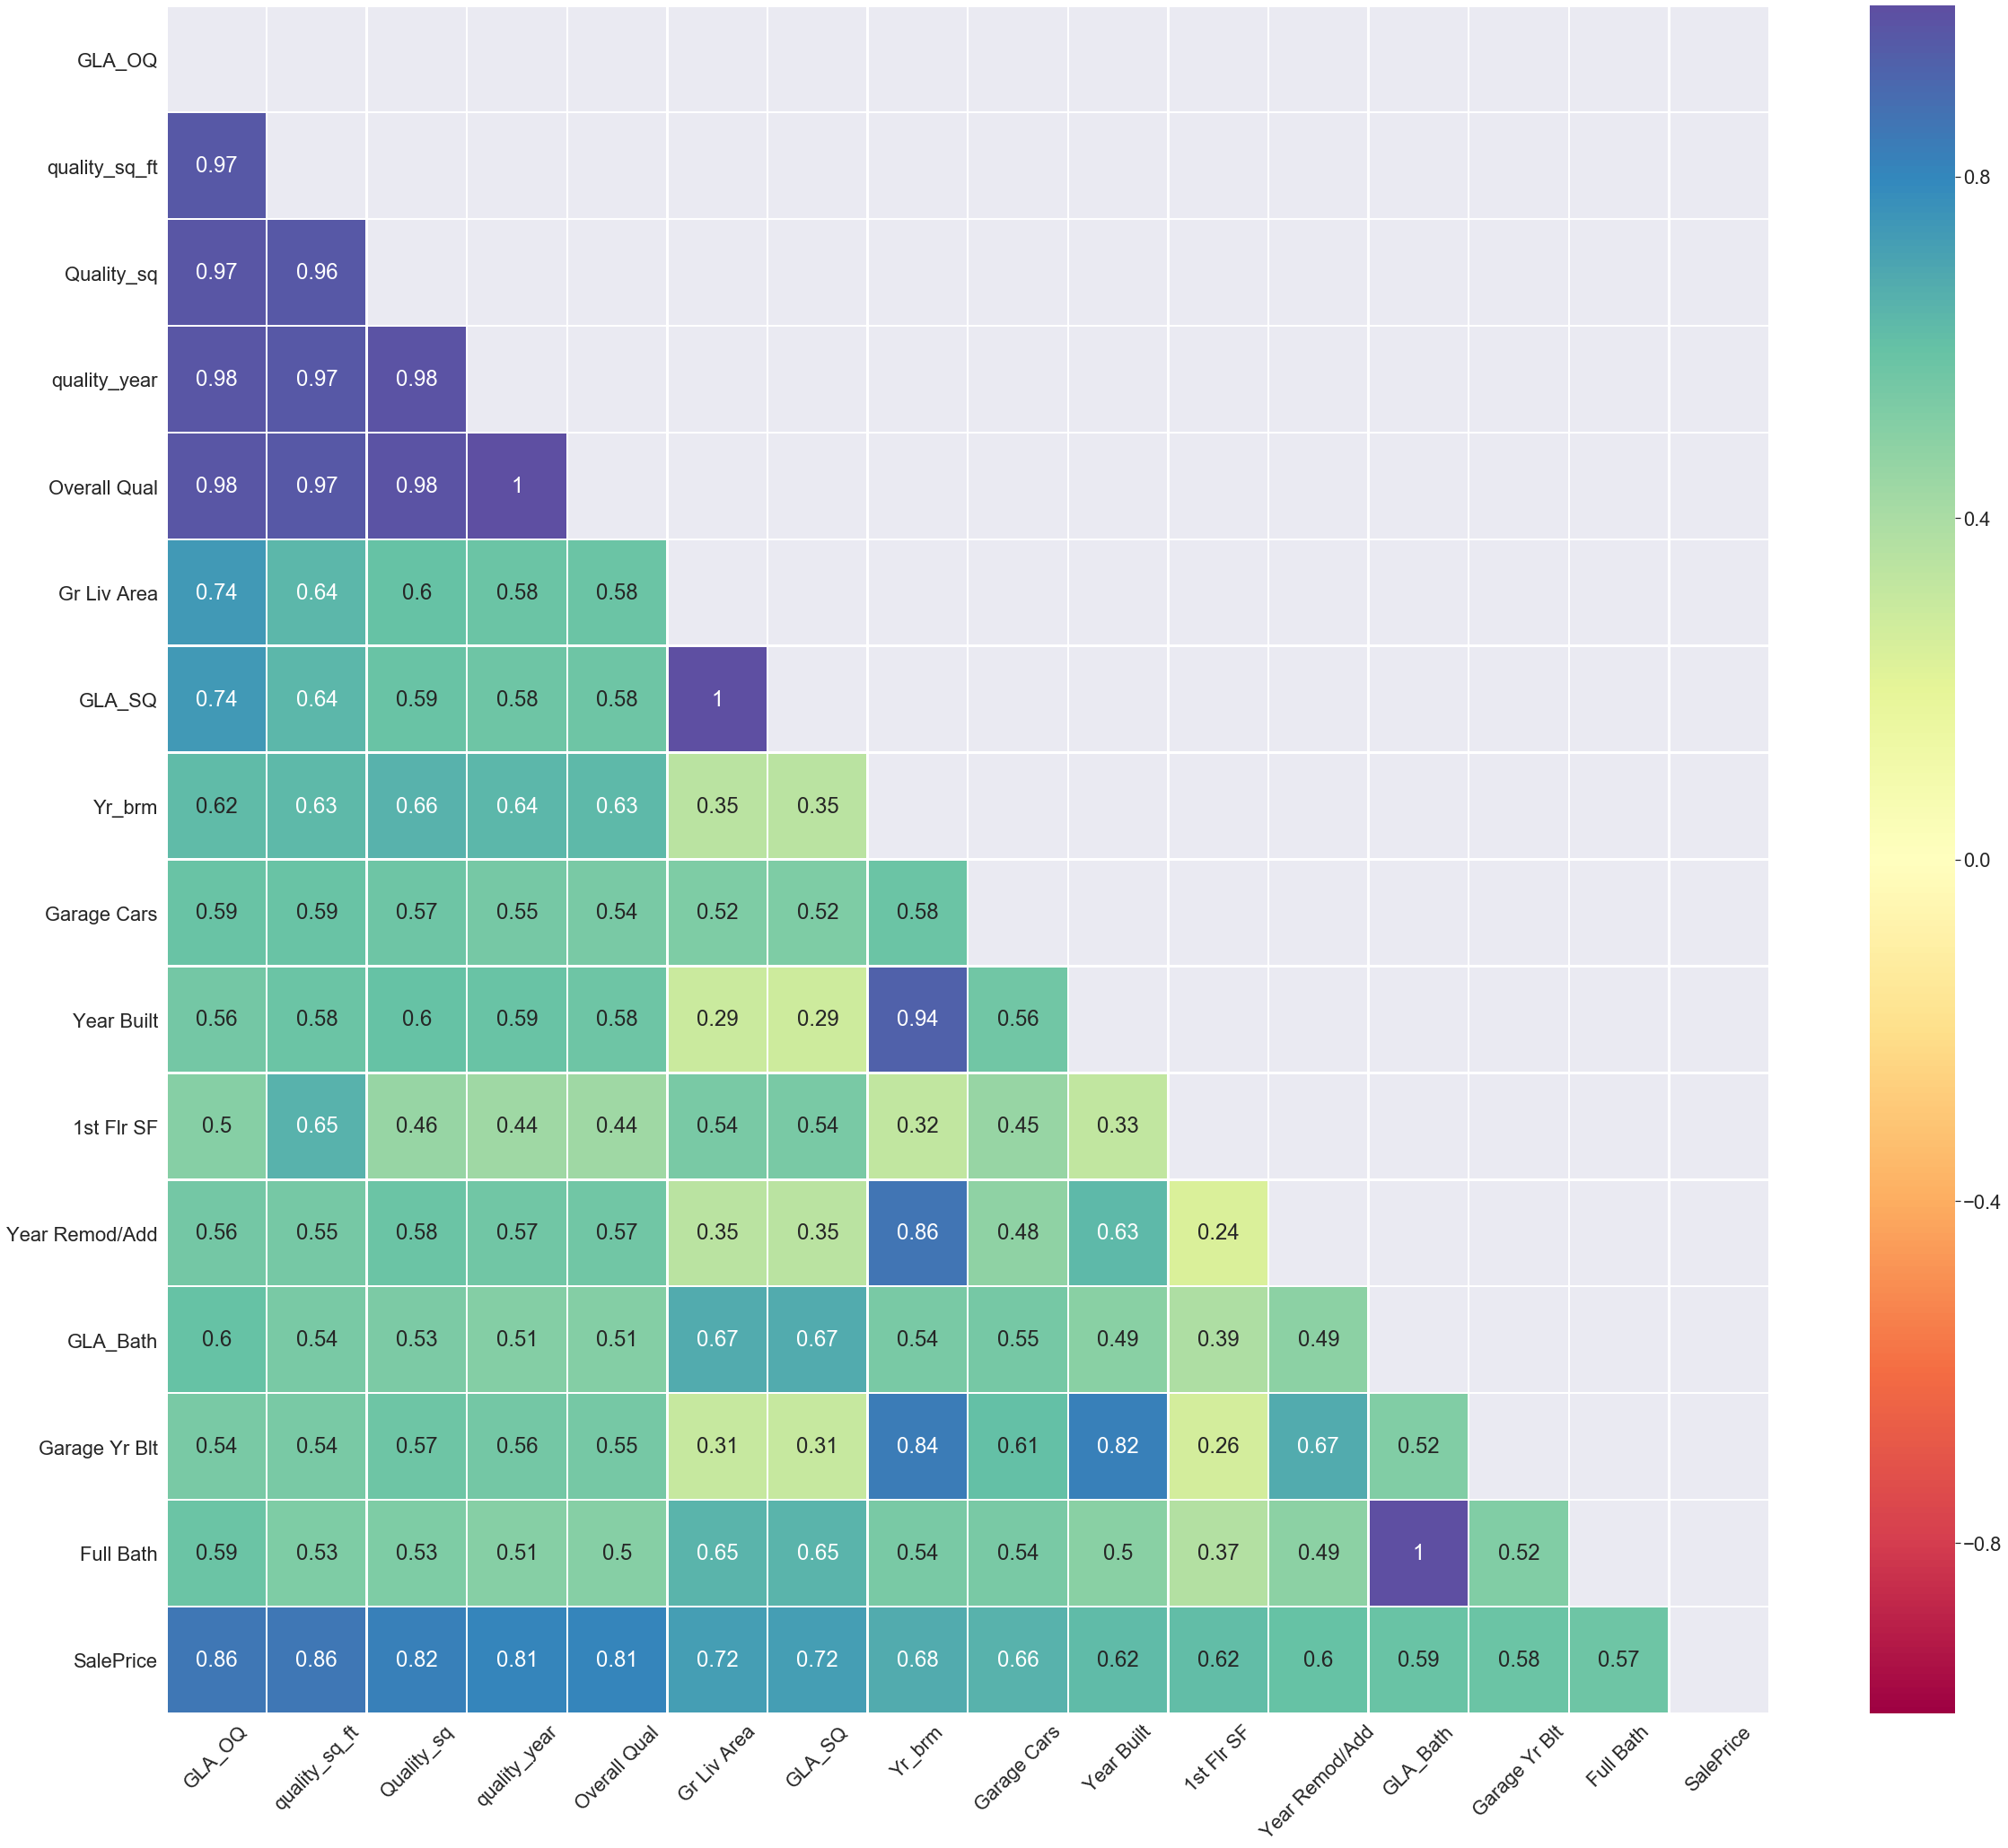

In [12]:
plt.figure(figsize = (40, 35))
mask = np.zeros_like(corr_2)
mask[np.triu_indices_from(mask)] = True
sns.set(font_scale = 2)
ax = sns.heatmap(corr_2, mask=mask, annot=True, cmap='Spectral', vmax=1, vmin=-1,
            square=False, linewidths=1.5,  cbar_kws={"shrink": 1.0}, xticklabels='auto')
plt.xticks(rotation=45);

In [ ]:
sns.set_style("white")
pp = sns.pairplot(data=ames_train_numeric_log,
                  x_vars=['Overall Qual','1st Flr SF', 'BsmtFin SF 1', 'Gr Liv Area', 'Garage Area'],
                  y_vars=['SalePrice'], height=5, aspect=0.75)

In [ ]:
pp = sns.pairplot(data=ames_train_numeric,
                  x_vars=['Overall Qual','1st Flr SF', 'BsmtFin SF 1', 'Gr Liv Area', 'Garage Area'],
                  y_vars=['SalePrice'], height=5, aspect=0.75)

In [ ]:
pp = sns.pairplot(data=ames_train_numeric,
                  x_vars=['Overall Qual','MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Cond'],
                  y_vars=['SalePrice'], height=5, aspect=0.75)

In [ ]:
pp = sns.pairplot(data=ames_train_numeric_log,
                  x_vars=['Overall Qual','MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Cond'],
                  y_vars=['SalePrice'], height=5, aspect=0.75)

In [ ]:
pp1 = sns.pairplot(data=ames_train_numeric,
                  x_vars=['Year Built','Total Bsmt SF', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2'],
                  y_vars=['SalePrice'], height=5, aspect=0.75)

In [ ]:
pp1 = sns.pairplot(data=ames_train_numeric_log,
                  x_vars=['Year Built','Total Bsmt SF', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2'],
                  y_vars=['SalePrice'], height=5, aspect=0.75)

In [ ]:
pp2 = sns.pairplot(data=ames_train_numeric,
                  x_vars=['Bsmt Unf SF','Year Remod/Add', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF'],
                  y_vars=['SalePrice'], height=5, aspect=0.75)

In [ ]:
pp2 = sns.pairplot(data=ames_train_numeric_log,
                  x_vars=['Bsmt Unf SF','Year Remod/Add', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF'],
                  y_vars=['SalePrice'], height=5, aspect=0.75)

In [ ]:
pp3 = sns.pairplot(data=ames_train_numeric,
                  x_vars=['Gr Liv Area','Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath'],
                  y_vars=['SalePrice'], height=5, aspect=0.75)

In [ ]:
pp3 = sns.pairplot(data=ames_train_numeric_log,
                  x_vars=['Gr Liv Area','Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath'],
                  y_vars=['SalePrice'], height=5, aspect=0.75)

In [ ]:
pp4 = sns.pairplot(data=ames_train_numeric,
                  x_vars=['Bedroom AbvGr','Kitchen AbvGr', 'TotRms AbvGrd', 'Open Porch SF', 'Wood Deck SF'],
                  y_vars=['SalePrice'], height=5, aspect=0.75)

In [ ]:
pp4 = sns.pairplot(data=ames_train_numeric_log,
                  x_vars=['Bedroom AbvGr','Kitchen AbvGr', 'TotRms AbvGrd', 'Open Porch SF', 'Wood Deck SF'],
                  y_vars=['SalePrice'], height=5, aspect=0.75)

In [ ]:
pp5 = sns.pairplot(data=ames_train_numeric,
                  x_vars=['Garage Yr Blt','Garage Cars', 'Garage Area', 'Fireplaces', 'Enclosed Porch'],
                  y_vars=['SalePrice'], height=5, aspect=0.75)

In [ ]:
pp5 = sns.pairplot(data=ames_train_numeric_log,
                  x_vars=['Garage Yr Blt','Garage Cars', 'Garage Area', 'Fireplaces', 'Enclosed Porch'],
                  y_vars=['SalePrice'], height=5, aspect=0.75)

In [ ]:
pp6 = sns.pairplot(data=ames_train_numeric,
                  x_vars=['3Ssn Porch','Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold'],
                  y_vars=['SalePrice'], height=5, aspect=0.75)

In [ ]:
pp6 = sns.pairplot(data=ames_train_numeric_log,
                  x_vars=['3Ssn Porch','Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold'],
                  y_vars=['SalePrice'], height=5, aspect=0.75)

In [ ]:
pp = sns.pairplot(data=ames_train,
        x_vars=['Gr Liv Area'],
        y_vars=['SalePrice'], hue='rich_hood', height=15, palette='husl', plot_kws=dict(s=50, edgecolor="k", linewidth=1));
pp.fig.set_size_inches(18, 9);

#  'Gr Liv Area', 'TotRms AbvGrd', '1st Flr SF', 'Year Built'

In [ ]:
pp = sns.pairplot(data=ames_train,

        x_vars=['Overall Qual'],
        y_vars=['SalePrice'], hue='rich_hood', height=15, palette='husl', plot_kws=dict(s=50, edgecolor="w", linewidth=1));
pp.fig.set_size_inches(18, 9);

#  'Gr Liv Area', 'TotRms AbvGrd', '1st Flr SF', 'Year Built'

In [ ]:
pp = sns.pairplot(data=ames_train,
        x_vars=['GLA_OQ'],
        y_vars=['SalePrice'], hue='rich_hood', height=15, palette='husl', plot_kws=dict(s=50, edgecolor="k", linewidth=1));
pp.fig.set_size_inches(18, 9);
pp.fig.suptitle("Living Area & Quality vs. Sale Price (Sorted by Neighborhood)");


In [ ]:
ax = sns.regplot(x="Gr Liv Area", y="SalePrice", data=ames_train, ci=95)

In [ ]:
ames_train.groupby('Bsmt Cond')['SalePrice'].agg(['mean']).sort_values(by='mean', ascending=False)

In [ ]:
pp = sns.pairplot(data=ames_train,
                  x_vars=['BsmtFin Type 1'],
                  y_vars=['SalePrice'], hue='BsmtFin Type 1', height=21, plot_kws={'s':100});
pp.fig.set_size_inches(21, 12);
pp._legend_data.keys()
#  'Gr Liv Area', 'TotRms AbvGrd', '1st Flr SF', 'Year Built'

f, ax = plt.subplots(2, 2, sharey=True, figsize=(10,10))
ax[0,0].scatter(ames_train['Overall Qual'], ames_train['SalePrice'])
# ax.set_title('Sharing Y axis')
ax[0,1].scatter(ames_train['Gr Liv Area'], ames_train['SalePrice'], )
ax[1,0].scatter(ames_train['Year Built'], ames_train['SalePrice'], )
ax[1,1].scatter(ames_train['1st Flr SF'], ames_train['SalePrice'], )

plt.show()


In [ ]:
# sns.pairplot(df, x_vars=['Accept', 'Enroll', 'F.Undergrad'], y_vars=['Apps'], kind='reg');
# sns.boxplot(df.Apps)

In [ ]:
pp = sns.pairplot(data=ames_train,
        x_vars=['home_age'],
        y_vars=['SalePrice'], height=15, palette='husl', plot_kws=dict(s=80, edgecolor="w", linewidth=1));
pp.fig.set_size_inches(18, 9);
pp.fig.suptitle("Newer Homes are more expensive on avarage");

#  'Gr Liv Area', 'TotRms AbvGrd', '1st Flr SF', 'Year Built'

In [ ]:
ppe1 = sns.pairplot(data=ames_train,
                  x_vars=['quality_year','base_1st', 'quality_sq_ft', 'Quality_sq'],
                  y_vars=['SalePrice'], height=5, aspect=0.75)

In [ ]:
ppe1L = sns.pairplot(data=ames_train_numeric_log,
                  x_vars=['quality_year','base_1st', 'quality_sq_ft', 'Quality_sq'],
                  y_vars=['SalePrice'], height=5, aspect=0.75)

In [ ]:
ppe2 = sns.pairplot(data=ames_train,
                  x_vars=['GLA_OQ','GLA_SQ', 'Yr_brm', 'GLA_Bath'],
                  y_vars=['SalePrice'], height=5, aspect=0.75)

In [ ]:
ppe2L = sns.pairplot(data=ames_train_numeric_log,
                  x_vars=['GLA_OQ','GLA_SQ', 'Yr_brm', 'GLA_Bath'],
                  y_vars=['SalePrice'], height=5, aspect=0.75)

In [ ]:
plt.figure(figsize = (40, 35))
plt.xticks(rotation=45)
mask = np.zeros_like(corr_1)
mask[np.triu_indices_from(mask)] = True
sns.set(font_scale = 2)
ax = sns.heatmap(corr_1, mask=mask, annot=True, cmap='Spectral', vmax=-1, vmin=-1,
            square=False, linewidths=1.5,  cbar_kws={"shrink": 1.0}, xticklabels='auto')
plt.xticks(rotation=45);

In [ ]:
plt.figure(figsize = (40, 35))
mask = np.zeros_like(corr_2)
mask[np.triu_indices_from(mask)] = True
sns.set(font_scale = 2)
ax = sns.heatmap(corr_2, mask=mask, annot=True, cmap='Spectral', vmax=1, vmin=-1,
            square=False, linewidths=1.5,  cbar_kws={"shrink": 1.0}, xticklabels='auto')
plt.xticks(rotation=45);

In [ ]:
ames_train_numeric_log.corr()[['SalePrice']].sort_values('SalePrice', ascending=False)

In [ ]:
tested_col = [
            'Overall Qual',
            '1st Flr SF',
            'Gr Liv Area',
            'TotRms AbvGrd',
            'garage_area_cars',
            'quality_year',
            'quality_sq_ft',
            'qual_neig',
            'Quality_sq',
            'GLA_OQ',
            'GLA_Bath',
            'Neighborhood',
            'Bldg Type',
            'Exterior 1st',
            
            
            ]

In [ ]:
ames_train.corr()[['SalePrice']].sort_values('SalePrice', ascending=False)

In [ ]:
corr_1 = ames_train[[
            'Overall Qual',
            'Yr_brm',
            'Total Bsmt SF', 
            '1st Flr SF',
            'Gr Liv Area',
            'Full Bath',
            'TotRms AbvGrd',
            'garage_area_cars',
            'quality_year',
            'quality_sq_ft',
            'qual_neig',
            'Quality_sq',
            'GLA_OQ',
            'GLA_Bath',
            'Neighborhood',
            'Bldg Type',
            'Exterior 1st',
            'SalePrice']].corr()
corr_2 = ames_train[[
            'Overall Qual',
            'Yr_brm',
            '1st Flr SF',
            'Gr Liv Area',
            'Full Bath',
            'garage_area_cars',
            'quality_year',
            'quality_sq_ft',
            'SalePrice']]

In [ ]:
ames_test_cateames_test_cate

In [ ]:
for col in ames_test_cate.columns:
    ames_test_cate.boxplot(column='SalePrice', by=col);